In [41]:
import pandas as pd
import sqlite3
conn = sqlite3.connect("my_database.db")
cursor = conn.cursor()

In [42]:
df = pd.read_csv("C:\\Users\\Tense\\Documents\\Flatiron\\dsc-phase-2-project-v3\\tn.movie_budgets.csv")
df.to_sql('movie_budgets',conn, if_exists='replace',index=False)
'''
CREATE TABLE movie_budgets (
    id INT PRIMARY KEY,
    movie VARCHAR(100),
    production_budget INT,
    domestic_gross INT,
    worldwide_gross INT,
    release_date DATE
);
'''
conn.commit()

In [43]:
query = "SELECT * FROM movie_budgets LIMIT 10"
result = pd.read_sql_query(query, conn)
print(result)

   id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   
5   6  Dec 18, 2015         Star Wars Ep. VII: The Force Awakens   
6   7  Apr 27, 2018                       Avengers: Infinity War   
7   8  May 24, 2007   Pirates of the Caribbean: At Worldâs End   
8   9  Nov 17, 2017                               Justice League   
9  10   Nov 6, 2015                                      Spectre   

  production_budget domestic_gross worldwide_gross  
0      $425,000,000   $760,507,625  $2,776,345,279  
1      $410,600,000   $241,063,875  $1,045,663,875  
2      $350,000,000    $42,762,350    $149,762,350  
3      $330,600,000   $459,005,868  $1,

In [44]:
query = """
SELECT movie, production_budget, domestic_gross, worldwide_gross
FROM movie_budgets
ORDER BY worldwide_gross DESC
LIMIT 10;
"""
conn.commit()
result = pd.read_sql_query(query, conn)
print(result)

                    movie production_budget domestic_gross worldwide_gross
0  Fifty Dead Men Walking       $10,000,000             $0        $997,921
1                    Duma       $12,000,000       $870,067        $994,790
2               Insidious        $1,500,000    $54,009,150     $99,870,886
3                 Hellboy       $60,000,000    $59,623,958     $99,823,958
4                 Mad Max          $200,000     $8,750,000     $99,750,000
5                   Alpha       $51,000,000    $35,851,379     $99,624,873
6          Street Fighter       $35,000,000    $33,423,000     $99,423,000
7             Nacho Libre       $32,000,000    $80,197,993     $99,296,462
8             Desert Blue        $5,000,000        $99,147         $99,147
9                  Hitman       $24,000,000    $39,687,694     $99,135,571


In [45]:
query = """
SELECT movie, production_budget, domestic_gross, worldwide_gross
FROM movie_budgets
WHERE movie IN ('Insidious', 'Hellboy', 'Mad Max', 'Alpha', 'Street Fighter', 'Nacho Libre');
"""

conn.commit()
result = pd.read_sql_query(query, conn)
print(result)

            movie production_budget domestic_gross worldwide_gross
0         Hellboy       $60,000,000    $59,623,958     $99,823,958
1           Alpha       $51,000,000    $35,851,379     $99,624,873
2         Hellboy       $50,000,000    $21,903,748     $40,725,492
3  Street Fighter       $35,000,000    $33,423,000     $99,423,000
4     Nacho Libre       $32,000,000    $80,197,993     $99,296,462
5       Insidious        $1,500,000    $54,009,150     $99,870,886
6         Mad Max          $200,000     $8,750,000     $99,750,000


In [46]:
query = """
SELECT 
    movie, 
    CAST(REPLACE(REPLACE(production_budget, '$', ''), ',', '') AS int) AS production_budget,
    CAST(REPLACE(REPLACE(domestic_gross, '$', ''), ',', '') AS INTEGER) AS domestic_gross,
    CAST(REPLACE(REPLACE(worldwide_gross, '$', ''), ',', '') AS INTEGER) AS worldwide_gross
FROM movie_budgets
WHERE movie IN ('Insidious', 'Hellboy', 'Mad Max', 'Alpha', 'Street Fighter', 'Nacho Libre');
"""

result = pd.read_sql_query(query, conn)
print(result)

            movie  production_budget  domestic_gross  worldwide_gross
0         Hellboy           60000000        59623958         99823958
1           Alpha           51000000        35851379         99624873
2         Hellboy           50000000        21903748         40725492
3  Street Fighter           35000000        33423000         99423000
4     Nacho Libre           32000000        80197993         99296462
5       Insidious            1500000        54009150         99870886
6         Mad Max             200000         8750000         99750000


In [47]:
query = """
SELECT 
    movie, 
    production_budget,
    domestic_gross,
    worldwide_gross,
    (domestic_gross + worldwide_gross) AS total_gross
FROM (
    SELECT 
        movie, 
        CAST(REPLACE(REPLACE(production_budget, '$', ''), ',', '') AS int) AS production_budget,
        CAST(REPLACE(REPLACE(domestic_gross, '$', ''), ',', '') AS INTEGER) AS domestic_gross,
        CAST(REPLACE(REPLACE(worldwide_gross, '$', ''), ',', '') AS INTEGER) AS worldwide_gross
    FROM movie_budgets
) AS subquery
WHERE movie IN ('Insidious', 'Hellboy', 'Mad Max', 'Alpha', 'Street Fighter', 'Nacho Libre');
"""

result = pd.read_sql_query(query, conn)
result


movie  production_budget  domestic_gross  worldwide_gross  \
0         Hellboy           60000000        59623958         99823958   
1           Alpha           51000000        35851379         99624873   
2         Hellboy           50000000        21903748         40725492   
3  Street Fighter           35000000        33423000         99423000   
4     Nacho Libre           32000000        80197993         99296462   
5       Insidious            1500000        54009150         99870886   
6         Mad Max             200000         8750000         99750000   

   total_gross  
0    159447916  
1    135476252  
2     62629240  
3    132846000  
4    179494455  
5    153880036  
6    108500000

In [48]:
result['profit'] = result['total_gross'] - result['production_budget']
result

movie  production_budget  domestic_gross  worldwide_gross  \
0         Hellboy           60000000        59623958         99823958   
1           Alpha           51000000        35851379         99624873   
2         Hellboy           50000000        21903748         40725492   
3  Street Fighter           35000000        33423000         99423000   
4     Nacho Libre           32000000        80197993         99296462   
5       Insidious            1500000        54009150         99870886   
6         Mad Max             200000         8750000         99750000   

   total_gross     profit  
0    159447916   99447916  
1    135476252   84476252  
2     62629240   12629240  
3    132846000   97846000  
4    179494455  147494455  
5    153880036  152380036  
6    108500000  108300000

In [49]:
query = """ SELECT movie,total_gross,profit
FROM movie_budgets
WHERE movie IN ('Insidious', 'Hellboy', 'Mad Max', 'Alpha', 'Street Fighter', 'Nacho Libre')
ORDER BY profit DESC;
"""
conn.commit()
#every $ moade per $ spent?
result

movie  production_budget  domestic_gross  worldwide_gross  \
0         Hellboy           60000000        59623958         99823958   
1           Alpha           51000000        35851379         99624873   
2         Hellboy           50000000        21903748         40725492   
3  Street Fighter           35000000        33423000         99423000   
4     Nacho Libre           32000000        80197993         99296462   
5       Insidious            1500000        54009150         99870886   
6         Mad Max             200000         8750000         99750000   

   total_gross     profit  
0    159447916   99447916  
1    135476252   84476252  
2     62629240   12629240  
3    132846000   97846000  
4    179494455  147494455  
5    153880036  152380036  
6    108500000  108300000

In [50]:
query = """SELECT 
    movie, 
    production_budget, 
    total_gross, 
    profit,
    (total_gross * 1.0 / production_budget) AS ROI
FROM 
    movie_budgets
WHERE 
    movie IN ('Insidious', 'Hellboy', 'Mad Max', 'Alpha', 'Street Fighter', 'Nacho Libre')
ORDER BY 
    ROI DESC;"""

conn.commit()
result




movie  production_budget  domestic_gross  worldwide_gross  \
0         Hellboy           60000000        59623958         99823958   
1           Alpha           51000000        35851379         99624873   
2         Hellboy           50000000        21903748         40725492   
3  Street Fighter           35000000        33423000         99423000   
4     Nacho Libre           32000000        80197993         99296462   
5       Insidious            1500000        54009150         99870886   
6         Mad Max             200000         8750000         99750000   

   total_gross     profit  
0    159447916   99447916  
1    135476252   84476252  
2     62629240   12629240  
3    132846000   97846000  
4    179494455  147494455  
5    153880036  152380036  
6    108500000  108300000

In [51]:
import pandas as pd

data = {
    "movie": ["Hellboy", "Alpha", "Hellboy", "Street Fighter", "Nacho Libre", "Insidious", "Mad Max"],
    "production_budget": [60000000, 51000000, 50000000, 35000000, 32000000, 1500000, 200000],
    "total_gross": [159447916, 135476252, 62629240, 132846000, 179494455, 153880036, 108500000]
}

df = pd.DataFrame(data)

df["ROI"] = df["total_gross"] / df["production_budget"]

print(df)


            movie  production_budget  total_gross         ROI
0         Hellboy           60000000    159447916    2.657465
1           Alpha           51000000    135476252    2.656397
2         Hellboy           50000000     62629240    1.252585
3  Street Fighter           35000000    132846000    3.795600
4     Nacho Libre           32000000    179494455    5.609202
5       Insidious            1500000    153880036  102.586691
6         Mad Max             200000    108500000  542.500000


In [52]:
df_sorted = df.sort_values(by='ROI', ascending=False)
print(df_sorted)

#Insidious: Horror
#Mad Max: Action, Adventure, Science Fiction

#Action and Horror have the two top returns on investment.

            movie  production_budget  total_gross         ROI
6         Mad Max             200000    108500000  542.500000
5       Insidious            1500000    153880036  102.586691
4     Nacho Libre           32000000    179494455    5.609202
3  Street Fighter           35000000    132846000    3.795600
0         Hellboy           60000000    159447916    2.657465
1           Alpha           51000000    135476252    2.656397
2         Hellboy           50000000     62629240    1.252585


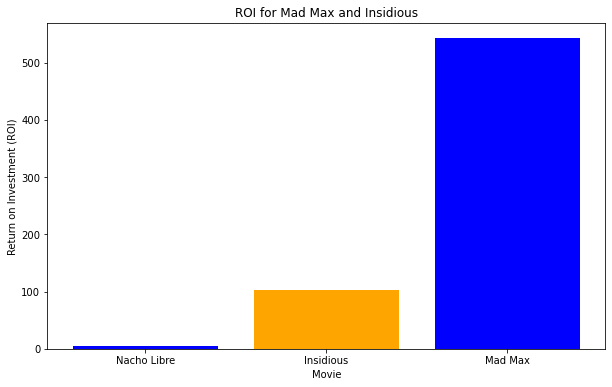

In [56]:
import matplotlib.pyplot as plt

# Filter the dataframe for the movies "Mad Max" and "Insidious"
df_filtered = df[df['movie'].isin(['Mad Max', 'Insidious','Nacho Libre'])]

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_filtered['movie'], df_filtered['ROI'], color=['blue', 'orange'])
plt.xlabel('Movie')
plt.ylabel('Return on Investment (ROI)')
plt.title('ROI for Mad Max and Insidious')
plt.show()